In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
import pickle as pkl

In [ ]:
with open('final_auto.pkl','rb') as f:
    final_copy=pkl.load(f)  ## Reading the data from cleaned_df.pkl

In [ ]:
df=final_copy.copy()

## The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

### Dropping Irrelevant data(columns) which are not useful for our analysis to decrease the memory usage

In [38]:
df.drop(columns=['abtest','postalCode','monthOfRegistration','offerType','dateCrawled','dateCreated','model','name','lastSeen','notRepairedDamage'],axis=1,inplace=True)

In [27]:
df['dollar_price']=df['dollar_price'].astype('uint16')

In [31]:
df['powerPS']=df['powerPS'].astype('uint16')

In [34]:
df['yearOfRegistration']=df['yearOfRegistration'].astype('uint16')

In [36]:
df['kilometer']=df['kilometer'].astype('uint32')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326472 entries, 0 to 371526
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   seller              326472 non-null  object
 1   brand               326472 non-null  object
 2   dollar_price        326472 non-null  uint16
 3   vehicleType         326472 non-null  object
 4   gearbox             326472 non-null  object
 5   powerPS             326472 non-null  uint16
 6   fuelType            326472 non-null  object
 7   kilometer           326472 non-null  uint32
 8   yearOfRegistration  326472 non-null  uint16
dtypes: object(5), uint16(3), uint32(1)
memory usage: 18.1+ MB


In [49]:
df.head()

,seller,brand,dollar_price,vehicleType,gearbox,powerPS,fuelType,kilometer,yearOfRegistration
0,private,volkswagen,528,Other,Manual,0,petrol,150000,1993
1,private,audi,20130,coupe,Manual,190,diesel,125000,2011
2,private,jeep,10780,suv,Automatic,163,diesel,125000,2004
3,private,volkswagen,1650,compact car,Manual,75,petrol,150000,2001
4,private,skoda,3960,compact car,Manual,69,diesel,90000,2008


## What is the Average price of vehicle by fuel type and gearbox type.Give a plot

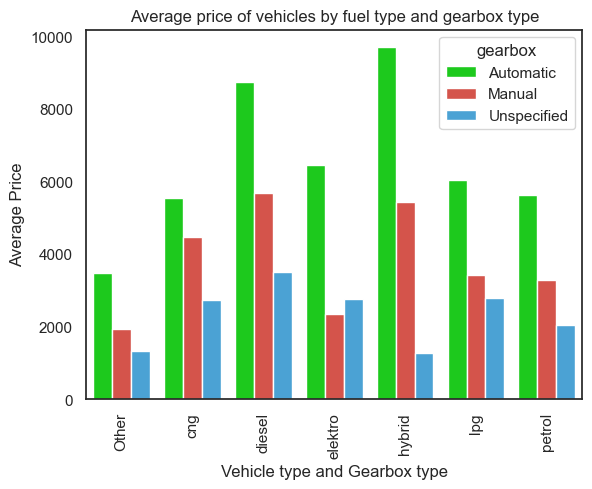

In [63]:
avg_price=(df.groupby(['fuelType','gearbox'])['dollar_price'].mean()).reset_index()
colors=["#00e600", "#eb4034","#34a8eb"]
sns.barplot(x='fuelType', y='dollar_price',hue="gearbox", palette=colors, data=avg_price)
plt.xlabel("Vehicle type and Gearbox type")
plt.ylabel("Average Price")
plt.title("Average price of vehicles by fuel type and gearbox type")
plt.xticks(rotation=90)
plt.show()

## What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

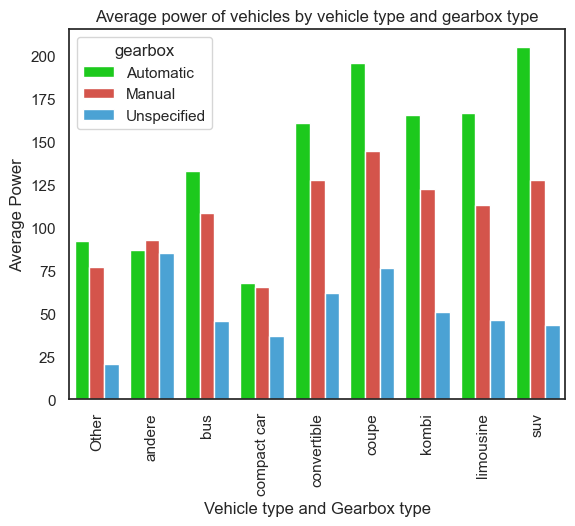

In [72]:
avg_power=(df.groupby(['vehicleType','gearbox'])['powerPS'].mean()).reset_index()
colors=["#00e600", "#eb4034","#34a8eb"]
sns.barplot(x='vehicleType', y='powerPS',hue="gearbox", palette=colors, data=avg_power)
plt.xlabel("Vehicle type and Gearbox type")
plt.ylabel("Average Power")
plt.title("Average power of vehicles by vehicle type and gearbox type")
plt.xticks(rotation=90)
plt.show()

## What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [67]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["dollar_price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,1517
1,volkswagen,coupe,8815
2,volkswagen,suv,15340
3,volkswagen,compact car,1789
4,volkswagen,limousine,4117


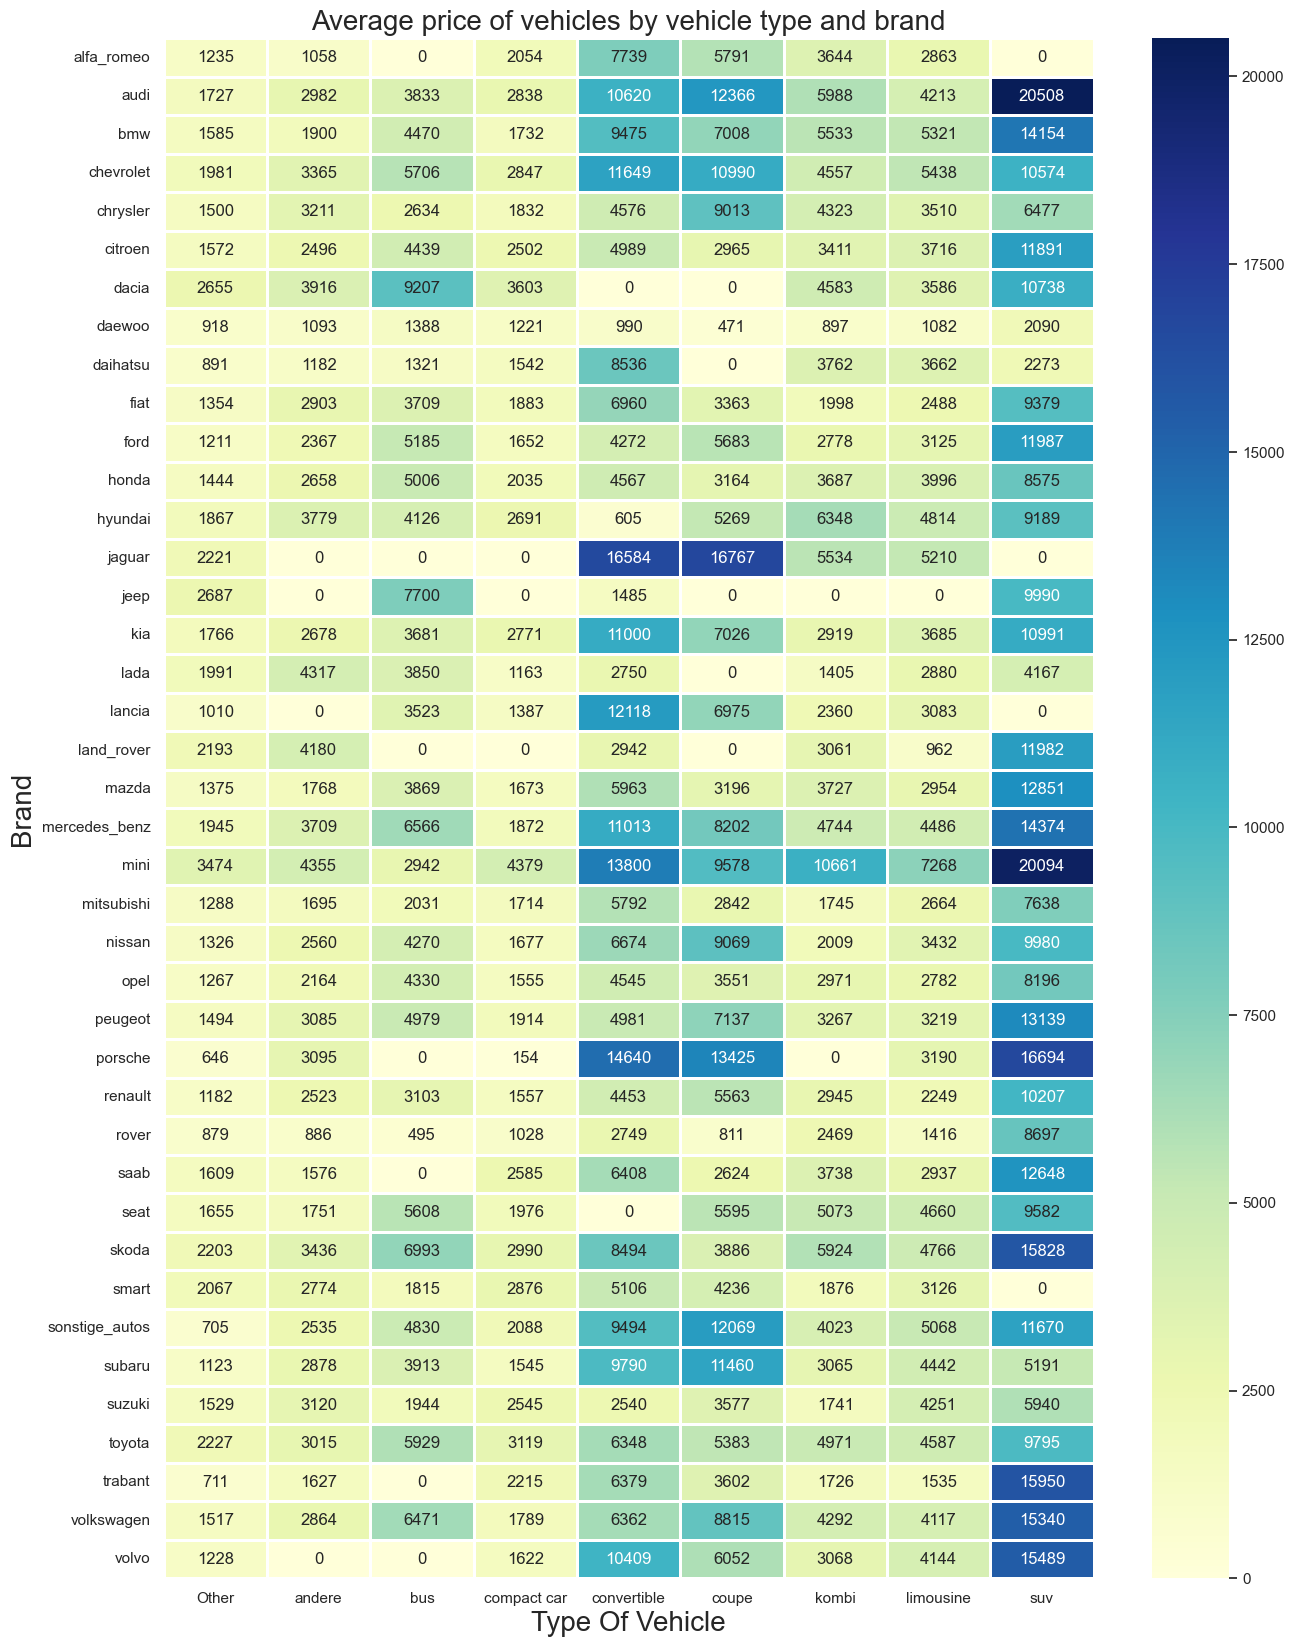

In [69]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
plt.title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [70]:
df.to_excel('cleaned_autos.xlsx')

In [2]:
import pickle as pkl

In [17]:
with open('final_auto.pkl','rb') as f:
    final_copy=pkl.load(f)